

# e316: Seismic Ray Tracing

In this lab, we will explore how seismic ray tracing can be used to model the propagation of seismic energy through the earth. Using ray tracing, we will estimate the epicentral distance and origin time for an earthquake.

Chapter 11 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#W7jZxE54KWWuUWEC.97), *Scale Analysis*, discusses the conditions where waves can be considered in terms of ray theory. This is not a bad approximation when the spatial variability in the physical parameters that define the wave propagation is large compared to the propagating wavelengths. In that case, the wave equation, can be reduced to the Eikonal equation, which describes the travel time $T$ of a seismic ray in a medium with wave speed $v({\bf r})$ as $$ |\nabla T({\bf r})|^2 = 1/v({\bf r})^2.$$ In our book you can read how to derive [Snell's Law](https://en.wikipedia.org/wiki/Snell%27s_law) from the Eikonal equation, for example.

There are many strategies under the umbrella of "ray tracing" to find the travel time of rays in media with arbitrary velocity distributions, but here we will explore the travel time and ray path of seismic waves in a spherically symmetric approximation of Earth.

### **Rays in a spherically symmetric Earth**
Having accepted ray theory in the Earth for high-frequency seismic waves, we can estimate the travel time $T$ and epicentral distance $\Delta$ of "seismic rays." To first order, the Earth is spherically symmetric, greatly simplifying ray propagation. In a spherically symmetric Earth, the 3D velocity distribution reduces to a 1D model: $v({\bf r})= v(r)$:

![Figure 1](https://auckland.figshare.com/ndownloader/files/14738099)

First, a small part of the ray path $ds$ satisfies Pythagoras' Rule: $ds^2 = dr^2 + (rd\Delta)^2$. Second, the take-off angle $i$ is the angle of the ray with the normal to the Earth's surface. A triangle shows that $\sin(i) = rd\Delta/ds$  Thirdly, Snell's Law in a spherically symmetric Earth is $r\sin (i) /v(r)=p$. This constant $p$ is called the ray parameter.

#### **Question 1**
Combining these three expressions, show that

$$ \frac{ds}{dr} = \frac{r}{\sqrt{r^2-(pv)^2}} \ \ \ \ \ \mbox{and}   \ \ \ \ \ \ \frac{d\Delta}{dr} = \frac{pv/r}{\sqrt{r^2-(pv)^2}}.$$
### **Time and distance of a ray**
To find the total ray path length $s$ and the epicentral distance $\Delta$ traveled by the ray, we integrate these expressions with regards to $r$.


Let's consider a ray that starts and ends at the surface, and travels an epicentral distance $\Delta$:
![Figure 2](https://auckland.figshare.com/ndownloader/files/14754827)

Then, we take advantage of the symmetry, by integrating twice from the point of maximum depth of the ray $r=r_0$ to the surface $r= R$:
$$
\Delta(p) = 2 \int_{r_0}^R \frac{pv/r} {\sqrt{r^2-(pv)^2}}dr.
$$

The travel time requires integration of $\frac{1}{v}\frac{ds}{dr}$ over $r$, so that:
$$
T(p) = 2 \int_{r_0}^R \frac{r/v} {\sqrt{r^2-(pv)^2}}dr.
$$
These equations could have also been derived directly from the Eikonal equation and the equation of kinematic ray tracing (see Aki and Richards, for example).


### **Rays in a sphere with constant speed**
In his book *Principles of Seismology*, Udias derives expressions for travel time and epicentral distance from source to receiver for the special case of a sphere with radius $R$ and a constant speed: $v(r) =c$. In this simplest of cases, the rays don't bend:

![Figure 3](https://auckland.figshare.com/ndownloader/files/14777435)

The travel time for these rays with ray parameter $p$ is
$$
T(p) = \frac{2}{c}\sqrt{R^2-p^2c^2},
$$
and the epicentral distance is
$$
\Delta(p) = 2\cos^{-1}\left(\frac{pc}{R}\right).
$$

####  **Question 2**
If you are a real buff in solving integrals analytically, you can set $v(r) = c$ and solve the integrals for $T$ and $\Delta$ from earlier in this notebook, but they are not easy! Instead, convince yourself of Udias' results by differentiating the expressions for $T$ and $\Delta$ with respect to $R=r$ to confirm the integrands for the general expressions of $T(p)$ and $\Delta(p)$ stated earlier.

### Comparing analytic with numerical solutions

We can now compare the analytic solution and the integral solution with a numerical approximation.
The code cell below calculates and plots the analytic and numerical expression for the travel time as a function of take-off angle.

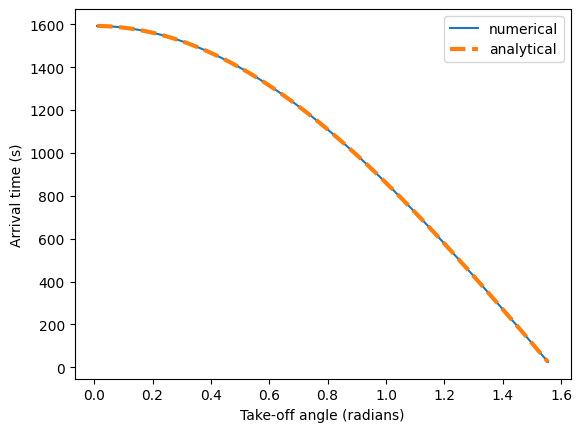

In [ ]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib notebook # comment this line out if you are using Colab, because it would not work.

# Set the wavespeed and radius of the sphere:
c = 8 # in km/s
R = 6371 # radius in km

# Function defining the integrand for travel time:
def T_integrand(r, c, p):
    return (2*r/c)/np.sqrt(r**2-(c*p)**2)

# We define a range of incidence angles/slash ray parameters:
angles = np.linspace(0.01,0.99*np.pi/2,100) # (almost) all angles, just avoiding some singularities
ps = R*np.sin(angles)/c

# the analytic travel times are:
Ts_udias =  2*np.sqrt(R**2 - ps**2*c**2)/c

# Compute a travel time t for each value of p:
Ts= [] # set up a list for the travel times for each p
for p in ps:
    T= quad(T_integrand, p*c, R, args=(c,p))[0]
    Ts.append(T)

plt.figure()
plt.plot(angles,Ts,label='numerical')
plt.plot(angles,Ts_udias,linewidth=3, linestyle='--',label='analytical')
plt.legend()
plt.xlabel('Take-off angle (radians)')
plt.ylabel('Arrival time (s)')
plt.show()

#### **Question 3**
Calculate and plot the analytic and numerical solutions for the *epicentral distance* $\Delta$ traveled by a ray as a function of its take-off angle.

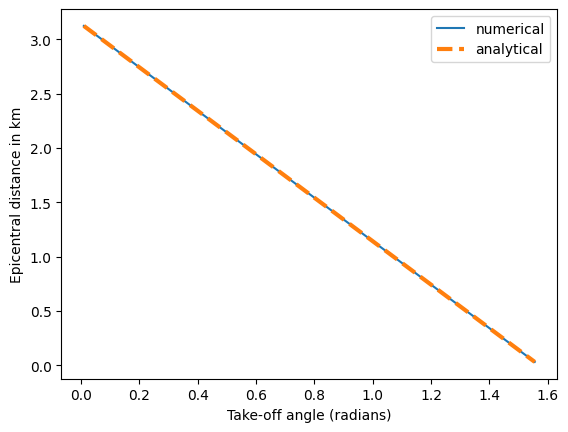

In [ ]:
# Set the wavespeed and radius of the sphere:
c = 8 # in km/s
R = 6371 # radius in km

# Function defining the integrand for travel time:
def Delta_integrand(r, c, p):
    return ((2*p*c)/r)/np.sqrt(r**2-(c*p)**2)

# We define a range of incidence angles/slash ray parameters:
angles = np.linspace(0.01,0.99*np.pi/2,100) # (almost) all angles, just avoiding some singularities
ps = R*np.sin(angles)/c

# the analytic travel times are:
Ts_udias =  (2*np.arccos((ps*c)/R))

# Compute a travel time t for each value of p:
Deltas= [] # set up a list for the travel times for each p
for p in ps:
    D= quad(Delta_integrand, p*c, R, args=(c,p))[0]
    Deltas.append(D)

plt.figure()
plt.plot(angles,Deltas,label='numerical')
plt.plot(angles,Ts_udias,linewidth=3, linestyle='--',label='analytical')
plt.legend()
plt.xlabel('Take-off angle (radians)')
plt.ylabel('Epicentral distance in km')
plt.show()

### The travel time of a specific ray
Now that you have travel time $T$ and epicentral distance $\Delta$ as a function of take of angle, you can determine the travel time of a ray that travels a certain epicentral distance!

#### Question 4
Plot travel time as a function of epicentral distance.

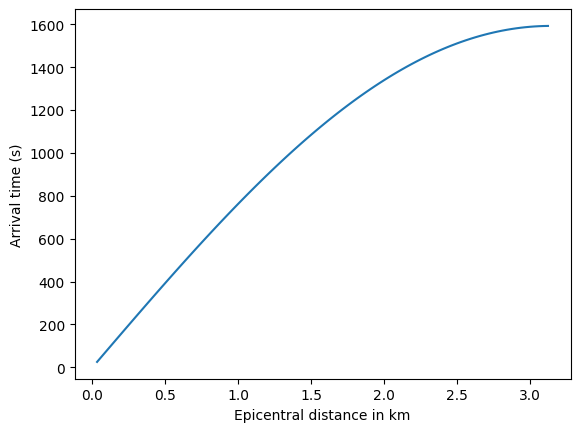

In [ ]:
T_of_D = 2*np.sqrt(R**2-R**2*np.cos(np.array(Deltas)/2)**2)/c

plt.figure()
plt.plot(Deltas,T_of_D)
plt.xlabel('Epicentral distance in km')
plt.ylabel('Arrival time (s)')
plt.show()

Why is the relation between travel time and epicentral distance not linear? The velocity is constant, after all....
A hint: plot travel time $T$ as a function of ray length $s$. To determine $s$, consider the triangle
![Figure 4](https://auckland.figshare.com/ndownloader/files/14777429)
and the sine rule that states $$\frac{s}{\sin(\Delta)} = \frac{R}{\sin\left(i\right)} = \frac{R}{\sin\left(\frac{\pi-\Delta}{2}\right)}.$$

#### Question 5

Plot $s$ versus $T$ and explain what you see here. Why is it a straight line? What is the slope of this line?

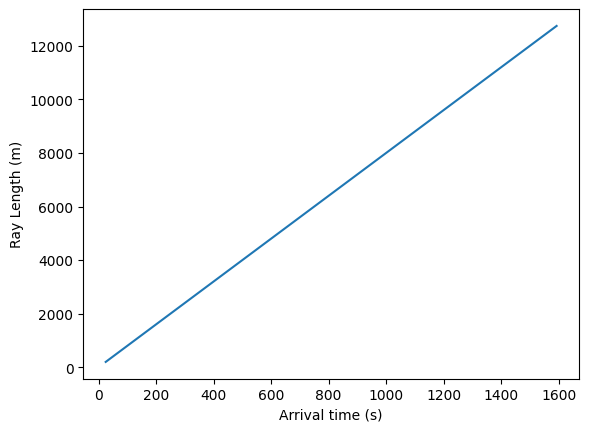

In [ ]:
# Make the plot linear
s= R*np.sin(np.arccos(1-(T_of_D**2*c**2)/(R**2*2)))/ np.sin(np.pi/2 - 0.5*np.arccos(1-(T_of_D**2*c**2)/(R**2*2)))
plt.figure()
plt.plot(T_of_D,s,label='numerical')
plt.xlabel('Arrival time (s)')
plt.ylabel("Ray Length (m)")
plt.show()

### Primary and secondary waves
So far, we did not discuss the waves represented here by rays. In the Earth, we generally have two kinds of waves that travel through the volume: P- and S-waves. Why are they called P- and S-wave? Hint: the equations for the P- and S-wave speeds hold the key to answering this question. Quote them in your report and discuss the three parameters in these definitions (assuming an isotropic medium).

In isotropic media, The primary wave or P-wave speed is $$v_{P}=\sqrt{\frac{K+\frac{4}{3}\mu}{\rho}},$$
where $K$ is the bulk modulus, $\mu$ the shear modulus, and $\rho$ is the density. The S-wave speed is $$v_{S}=\sqrt{\frac{\mu}{\rho}}.$$ Note that $v_p> v_s$. Always.

Not only are P-waves faster than S-waves, they also differ in terms of polarization. S-waves have transverse polarization, just like electromagnetic waves: particles excited by the S-wave are moving perpendicular to the direction of propagation. P-waves, on the other hand, have a longitudinal polarization: particles are moved by the P-wave *in* the direction of propagation.

## The Primary Reference Earth Model (PREM)

In the Earth, the seismic wave speed is far from constant. For example, there is a sudden drop in wave speed (due to a phase change) from the outer to the inner core. More realistic P- and S-wave speeds as a function of the depth, based on seismic observations, are captured in the [Preliminary Reference Earth Model (PREM)](https://en.wikipedia.org/wiki/Preliminary_reference_Earth_model). For reference, you can find more information about the PREM data set [here](https://ds.iris.edu/ds/products/emc-prem/). The code cell below prints the columns of this model for the P-wave and the S-wave:

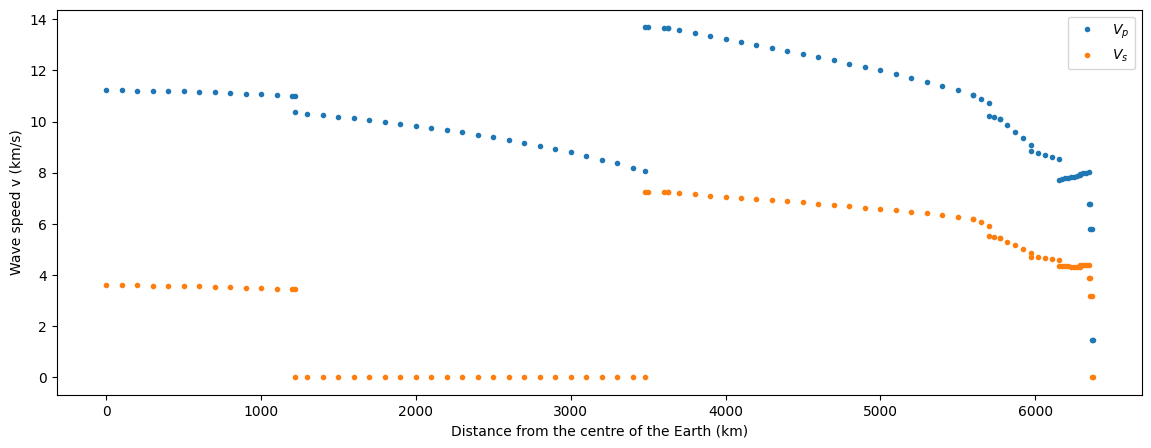

In [ ]:
import pandas as pd

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
df = pd.read_csv(url, usecols=[0,1,2,3], names=['radius','density', 'vP','vS'], header=None)
vp = np.array(df['vP'])/1000 # in km/s
vs = np.array(df['vS'])/1000 # in km/s
r = np.array(df['radius'])/1000 # radius in km
plt.figure(figsize=(14,5))
plt.plot(r,vp,label='$V_p$',linestyle='none',marker='.')
plt.plot(r,vs,label='$V_s$',linestyle='none',marker='.')
plt.xlabel('Distance from the centre of the Earth (km)')
plt.ylabel('Wave speed v (km/s)')
plt.legend()
plt.show()

### The main features of a radially symmetric Earth
You can divide the PREM model in four regions.

#### Question 6
Discuss what you see in each of these four regions in the PREM data, and relate these observations to the physical properties of the regions.

#### Question 7
The PREM model you loaded in the pandas dataframe `df` has more columns than just $v_P$ and $v_S$.
Plot the column with density of the Earth as a function of $r$. Discuss what you see, and compare this to $v_P$ and $v_S$. Now you know the equations for the wavespeeds, what does this tell you about the parameters involved?

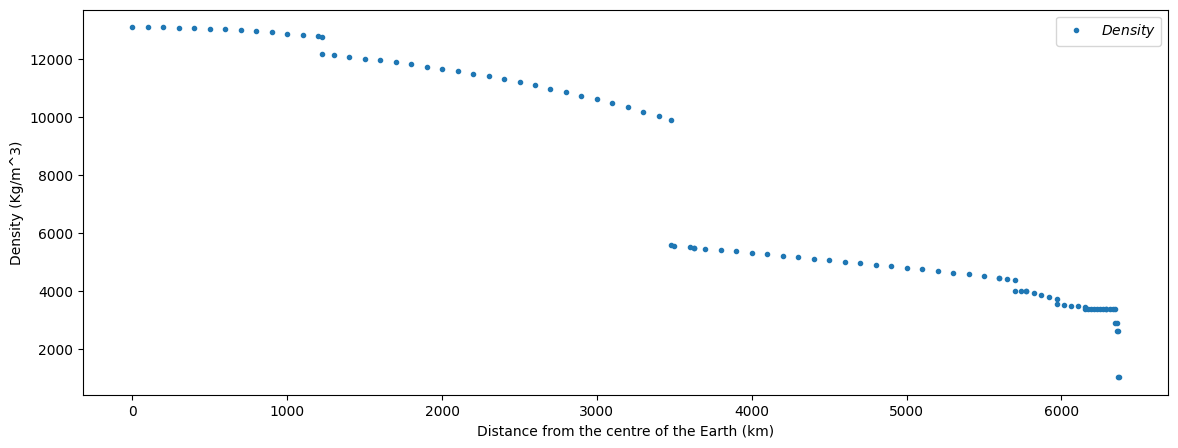

In [ ]:
p = np.array(df["density"])

plt.figure(figsize=(14,5))
plt.plot(r,p,label='$Density$',linestyle='none',marker='.')
plt.xlabel('Distance from the centre of the Earth (km)')
plt.ylabel('Density (Kg/m^3)')
plt.legend()
plt.show()


### Travel times of seismic rays in the PREM model
Let's estimate the P-wave travel time as a function of epicentral distance based on the PREM $v_P(r)$ and the integrals presented at the start of this notebook. But first, we must interpolate the PREM-supplied $v_P(r)$ to get a regularly spaced 1D array.

#### Question 8
Use the `scipy.interpolate.interp1d` function to create an array of velocities at 400 equally spaced depths in the Earth. The documentation online has examples on how to do interpolation with this function. Plot the interpolated data set with the original `r` and `vp` values from above, and include a legend.

Important: call the new 400 element array with depths `newx` and the new 400-element array with compressional wave speeds for each of these depths `newy`.


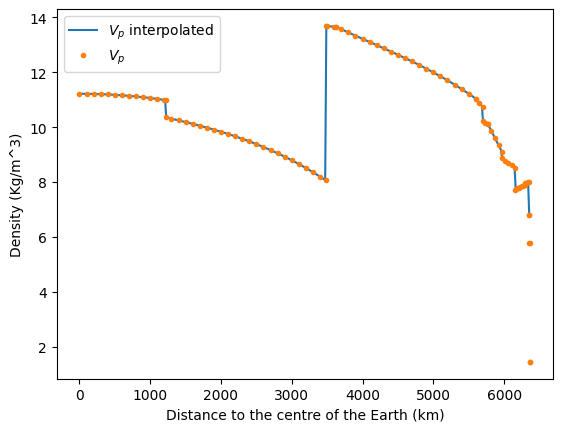

In [ ]:
 # Write your code here
from scipy.interpolate import interp1d
newx = np.arange(0,R,R/400)
newy = np.interp(newx,r,vp)

plt.figure()
plt.plot(newx,newy,label='$V_p$ interpolated')
plt.plot(r,vp,label='$V_p$',linestyle='none',marker='.')
plt.xlabel('Distance to the centre of the Earth (km)')
plt.ylabel('Density (Kg/m^3)')
plt.legend()
plt.show()

### Integration by Riemann summation
We'll evaluate the integrals by taking [Riemann sums](https://en.wikipedia.org/wiki/Riemann_sum) of the PREM velocity model for the (regular) $v_P(r)$.

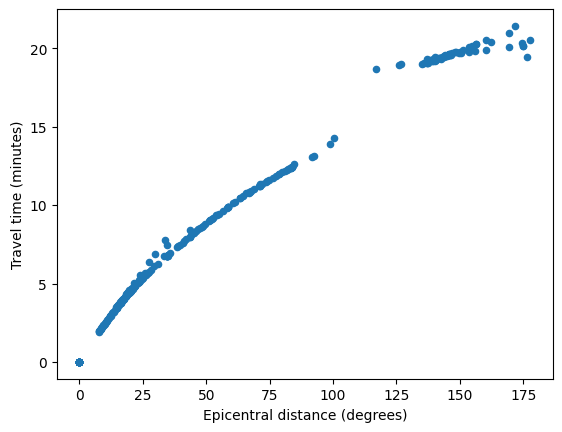

In [ ]:
# The velocity model starts at R=0, the centre of the Earth. But our integration starts at the surface and goes to the
# turning point of the ray.
# So for our summation to work, we flip the order of the model, so that the first elements of vp and r
# are at the surface of the Earth:
r= np.flip(newx)
vp = np.flip(newy)

dr = r[0]-r[1] # is the constant for Riemann sums
angles = np.linspace(0.05,0.95*np.pi/2,400) # defining a range of take off angles. Numerical instablities near 0 and 90 degrees need to be avoided.
Tp = []
Deltap = []

for angle in angles:
    p = r[0]*np.sin(angle)/vp[0] # constant ray parameter for each take-off angle
    T = 0
    Delta = 0
    for i in range(1,len(r)):
        if (p*vp[i])< r[i]: # consider the ray from the surface until it turns
            denom = np.sqrt(r[i]**2- (p*vp[i])**2)
            T = T + 2*dr*r[i]/vp[i]/denom
            Delta = Delta + 2*dr*p*vp[i]/r[i]/denom
        else:
            break
    Tp.append(T)
    Deltap.append(Delta)

plt.figure()
plt.scatter(180*np.array(Deltap)/np.pi,np.array(Tp)/60, s=20)
plt.xlabel('Epicentral distance (degrees)')
plt.ylabel('Travel time (minutes)')
plt.show()

These travel times are quite realistic, but as always: the devil is in the details. Our interpolation has smoothed out some important detail in the velocity model that is responsible for the (correct) P-wave [shadow zone](https://en.wikipedia.org/wiki/Shadow_zone), for example. More sophisticated schemes to estimate travel times for seismic arrivals are explored in the second part of this lab, where we use readily written code based on the (delay-time $\tau$, ray parameter $p$)-domain, originally proposed by Buland and Chapman (1983), coded up in the [Taup toolkit](https://www.seis.sc.edu/taup/), and then wrapped in [ObsPy](https://github.com/obspy/obspy/wiki).

# **Tracing your own seismic ray paths through the Earth**

The software we use for ray tracing in the Earth is called [“TauP”](https://pubs.geoscienceworld.org/ssa/srl/article/70/2/154/142385/the-taup-toolkit-flexible-seismic-travel-time-and). Information about the package, including the manual can be downloaded [here](http://www.seis.sc.edu/TauP/). This code should run in the notebook on Colab, but you are welcome to run the code locally on a lab computer or laptop. You could run TauP standalone, but [obspy](https://docs.obspy.org/) provides a Python class called
Taup, which comes with a function [plot_ray_paths](https://docs.obspy.org/packages/autogen/obspy.taup.tau.plot_ray_paths.html#obspy.taup.tau.plot_ray_paths). This function can be used like this:

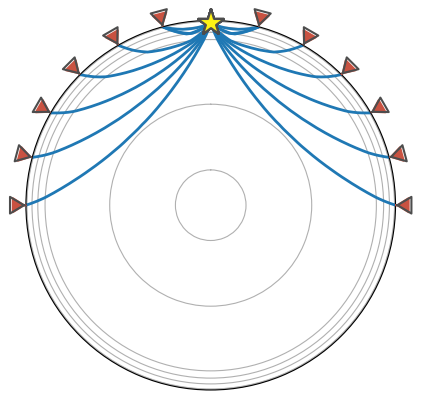

<PolarAxes: >

In [ ]:
!pip install obspy # this is installing obspy if you do not have it yet.

from obspy.taup.tau import plot_ray_paths
plot_ray_paths(source_depth=100,phase_list=['P'],npoints=25)

#### Question 9
Read the documentation for the `plot_rays` function and plot S- and P-wave arrivals from 0 to 360 degrees. Why are there gaps (shadows) in the arrivals?

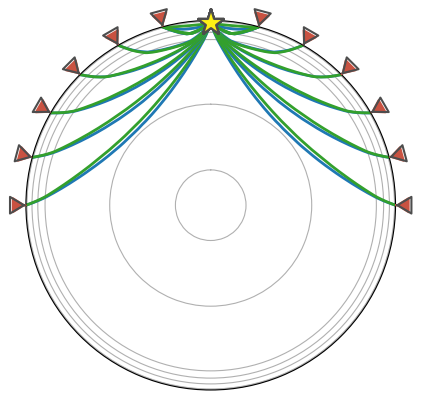

<PolarAxes: >

In [ ]:
plot_ray_paths(source_depth=100,phase_list = ['S','P'], npoints=25)

Besides your plain P- and S-wave phases, there are a host of other — more complicated — seismic ray paths from earthquake to receiver. [This link](http://www.iris.edu/data/vocab.htm) describes the naming conventions.

#### Question 10
What is a PKP ray?
Plot the PKP rays and P rays from 0–360 degrees. If we consider PKP a direct compressional arrival, what is the range of the P-wave shadow zone?

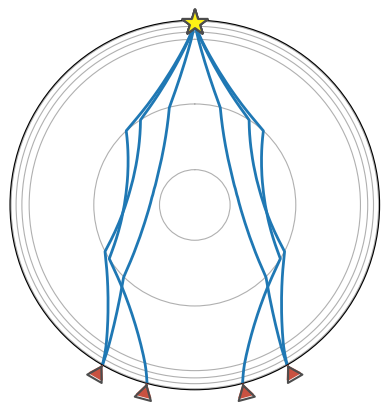

<PolarAxes: >

In [ ]:
plot_ray_paths(source_depth=100,phase_list = ['PKP'], npoints=25)
#unspecified P wave bottoming in the core

#### Question 11

Illustrate with a figure and explain in words why P-waves at smaller epicentral distances (0–35 degrees) appear to cross. To zoom in on the ray paths at smaller epicentral distance, use the option to plot ray paths in a Cartesian coordinate system. *Confirm the same occurs for S-waves*.

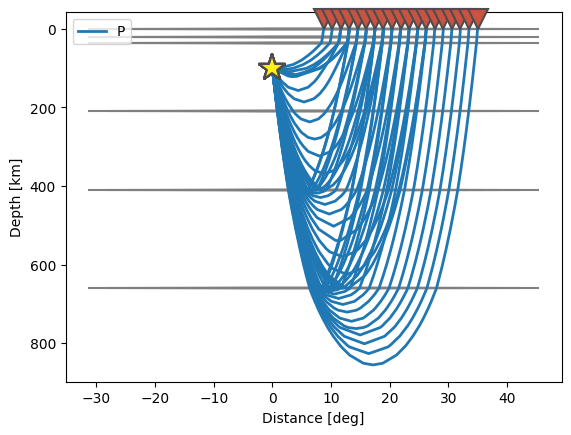

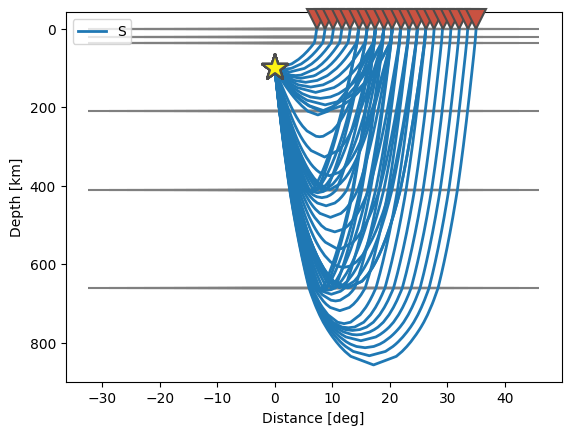

<Axes: xlabel='Distance [deg]', ylabel='Depth [km]'>

In [ ]:
plot_ray_paths(source_depth=100,phase_list = ['P'],max_degrees = 35,plot_type = 'cartesian', npoints=25,legend = True)
plot_ray_paths(source_depth=100,phase_list = ['S'],max_degrees = 35,plot_type = 'cartesian', npoints=25,legend = True)

# **The travel times of seismic rays**

The previous tasks involved mainly the spatial distribution of seismic ray paths in the earth. One of the simplest examples of using obspy is to create a travel time plot of different seismic phases. For example, if you execute the following three lines of code, the direct S-wave arrival time as a function of epicentral distance appears:

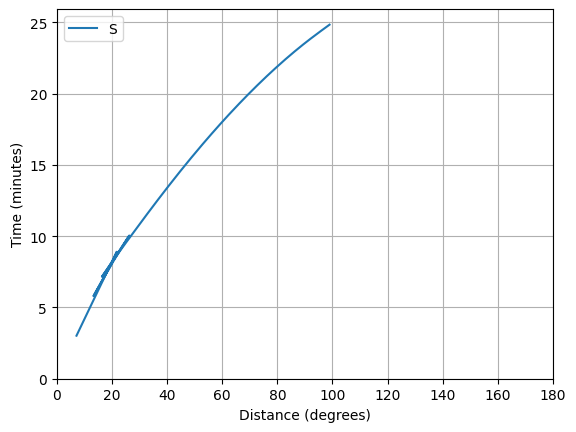

<Axes: xlabel='Distance (degrees)', ylabel='Time (minutes)'>

In [ ]:
from obspy.taup import plot_travel_times
plot_travel_times(source_depth=100, phase_list=["S"])

#### Question 12

Make one figure that contains the travel-time curves for P, S, SS, and PP arrivals at 100 points between 0 and 90 degrees epicentral distance, for an earthquake at 100 km depth. What are the definitions of these four wave types?

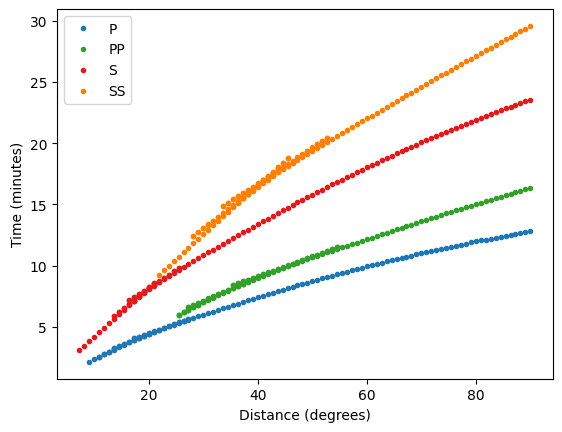

Axes(0.125,0.11;0.775x0.77)


In [ ]:

ax = plot_travel_times(source_depth=100, max_degrees = 90, phase_list=["S","P","SS","PP"],npoints=100)


### Epicentre estimation from seismograms

The previous analyses were based on models where the elastic properties only vary in the radial direction; in other words, the Earth we considered has a *spherical symmetry*. In the remainder of this lab, we will see that this assumption is good enough to estimate the epicentre of a real earthquake.

#### Question 13

The following code downloads seismic data for station SNZO from IRIS with the recordings of an Earthquake:

<Figure size 640x480 with 0 Axes>

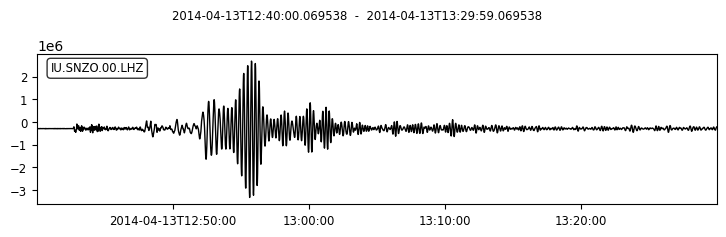

<Figure size 640x480 with 0 Axes>

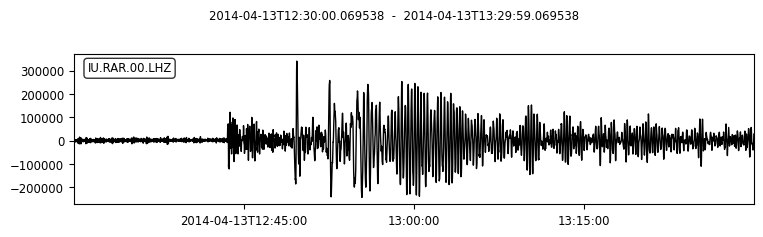

<Figure size 640x480 with 0 Axes>

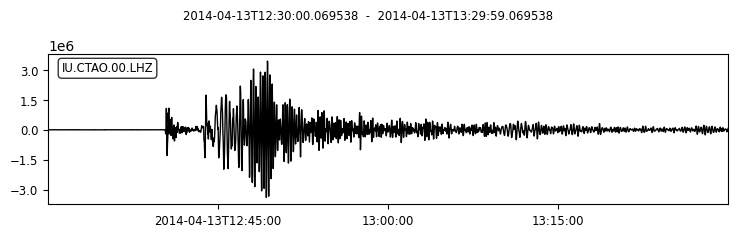

In [ ]:
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime

client = Client("IRIS") # IRIS is the host of the data
t1 = UTCDateTime('2014-04-13T12:30:00.00') # start time
t2 = t1 + 3600 # end time
st = client.get_waveforms("IU", "SNZO", "00", "LHZ", t1, t2)  # in later parts, you can ex-change SNZO for another stations.

st.trim(starttime = UTCDateTime('2014-04-13T12:40:00.00'), endtime = UTCDateTime('2014-04-13T13:30:00.00'))

plt.figure()
st.plot()
plt.show()

#Rarotonga, Cook Island


st_r = client.get_waveforms("IU", "RAR", "00", "LHZ", t1, t2)  # in later parts, you can ex-change SNZO for another stations.

st_r.trim(starttime = UTCDateTime('2014-04-13T12:30:00.00'), endtime = UTCDateTime('2014-04-13T13:30:00.00'))

plt.figure()
st_r.plot()
plt.show()

#OZ


st_a = client.get_waveforms("IU", "CTAO", "00", "LHZ", t1, t2)  # in later parts, you can ex-change SNZO for another stations.

st_a.trim(starttime = UTCDateTime('2014-04-13T12:30:00.00'), endtime = UTCDateTime('2014-04-13T13:30:00.00'))

plt.figure()
st_a.plot()
plt.show()

Zoom in on the part of the graph that you think contains the important body wave arrivals. If you use Colab, you cannot zoom in a figure panel, but you should use the [trim function](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.trim.html).

Identify the arrival time of the P, S, SS, and PP arrival. Your earlier work determines the order of these arrivals.

By the way, the largest amplitudes in the seismogram are due to surface waves. Plot the arrivals on the graph by making use of this example code:

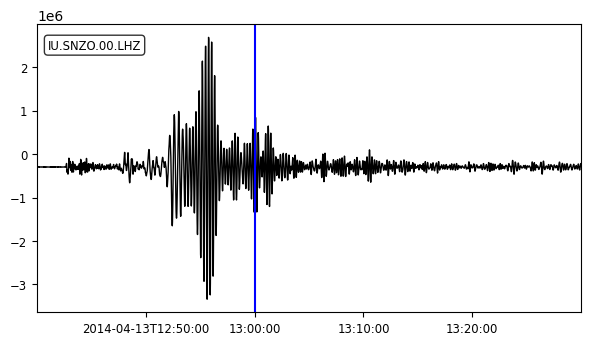

In [ ]:
example_arrival = t1 + 1800
fig = plt.figure()
st.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=example_arrival.datetime, label='Arrival', color='blue')
plt.show()

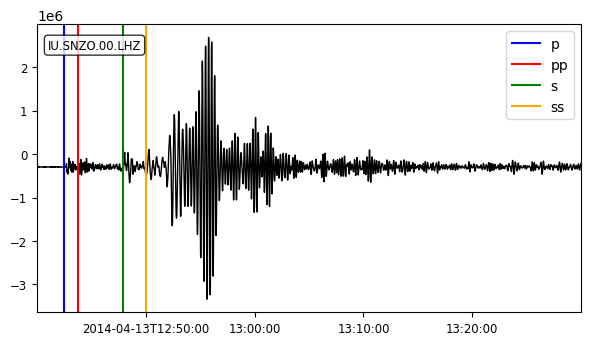

In [ ]:
p = t1 + 750
pp = t1 + 825
s = t1 + 1075
ss = t1 + 1200

fig = plt.figure()
st.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=p.datetime, label='p', color='blue')
ax.axvline(x=pp.datetime, label='pp', color='red')
ax.axvline(x=s.datetime, label='s', color='green')
ax.axvline(x=ss.datetime, label='ss', color='orange')
plt.legend()
plt.show()




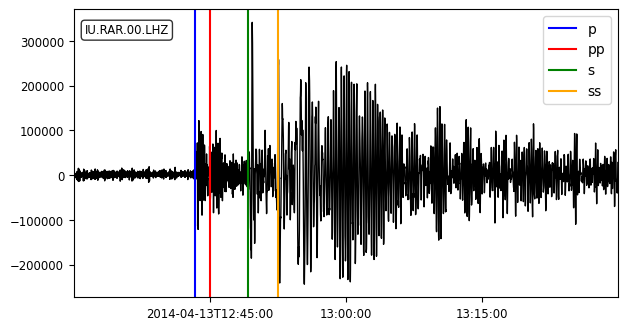

In [ ]:
#Raro
rp = t1 + 800
rpp = t1 + 900
rs = t1 + 1150
rss = t1 + 1350

fig = plt.figure()
st_r.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=rp.datetime, label='p', color='blue')
ax.axvline(x=rpp.datetime, label='pp', color='red')
ax.axvline(x=rs.datetime, label='s', color='green')
ax.axvline(x=rss.datetime, label='ss', color='orange')
plt.legend()
plt.show()

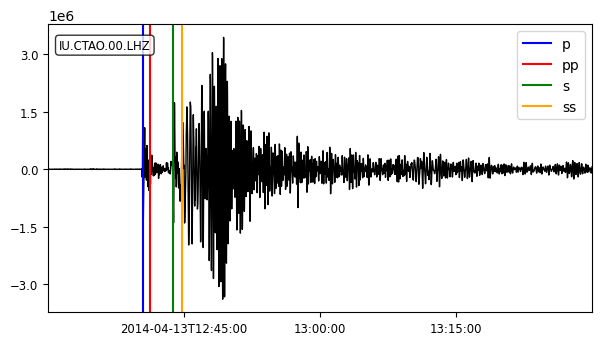

In [ ]:
#OZ
a_p = t1 + 625
a_pp = t1 + 675
a_s = t1 + 825
a_ss = t1 + 885

fig = plt.figure()
st_a.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=a_p.datetime, label='p', color='blue')
ax.axvline(x=a_pp.datetime, label='pp', color='red')
ax.axvline(x=a_s.datetime, label='s', color='green')
ax.axvline(x=a_ss.datetime, label='ss', color='orange')
plt.legend()
plt.show()

#### Question 14
Calculate the delay times between the arrivals of P, S, PP, and SS waves. Use these delay times and your graph of predicted arrival times from before to estimate the epicentral distance of this earthquake.

In [ ]:

#Assume the speed is 8 Km/s
delay_ps = (s-p)/60
delay_ppp = (pp - p)/60
delay_pss = (ss - p)/60 # all in minutes
print("SNZO")
print("delay_ppp",delay_ppp)
print("delay_ps",delay_ps)
print("delay_pss",delay_pss)

# From graph it looked lik 38 degrees from a depth of 100km
# 39 degrees to rads roughly 0.66
epi_distance = (R*np.sin(0.680678))/np.sin(np.pi/2 - 0.680678/2)
print(epi_distance)

# Rarotonga
delay_ps = (rs-rp)/60
delay_ppp = (rpp - rp)/60
delay_pss = (rss - rp)/60 # all in minutes
print('\n',"Rarotonga")
print("delay_ppp",delay_ppp)
print("delay_ps",delay_ps)
print("delay_pss",delay_pss)
# about 53 degrees
repi_distance = (R*np.sin(0.875025))/np.sin(np.pi/2 - 0.875025/2)
print(repi_distance)

# Australia
print('\n',"OZ")
delay_ppp = (a_pp - a_p)/60
delay_ps = (a_s-a_p)/60
delay_pss = (a_ss - a_p)/60 # all in minutes

print("delay_ppp",delay_ppp)
print("delay_ps",delay_ps)
print("delay_pss",delay_pss)
# about 25 degrees
pepi_distance = (R*np.sin(0.301426))/np.sin(np.pi/2 - 0.301426/2)
print(pepi_distance)



SNZO
delay_ppp 1.25
delay_ps 5.416666666666667
delay_pss 7.5
4253.364548416214

 Rarotonga
delay_ppp 1.6666666666666667
delay_ps 5.833333333333333
delay_pss 9.166666666666666
5398.627142345246

 OZ
delay_ppp 0.8333333333333334
delay_ps 3.3333333333333335
delay_pss 4.333333333333333
1913.1232299409771


#### Question 15

Plot a circle with a radius equal to the epicentral distance from SNZO on a world map using this example code:

/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr

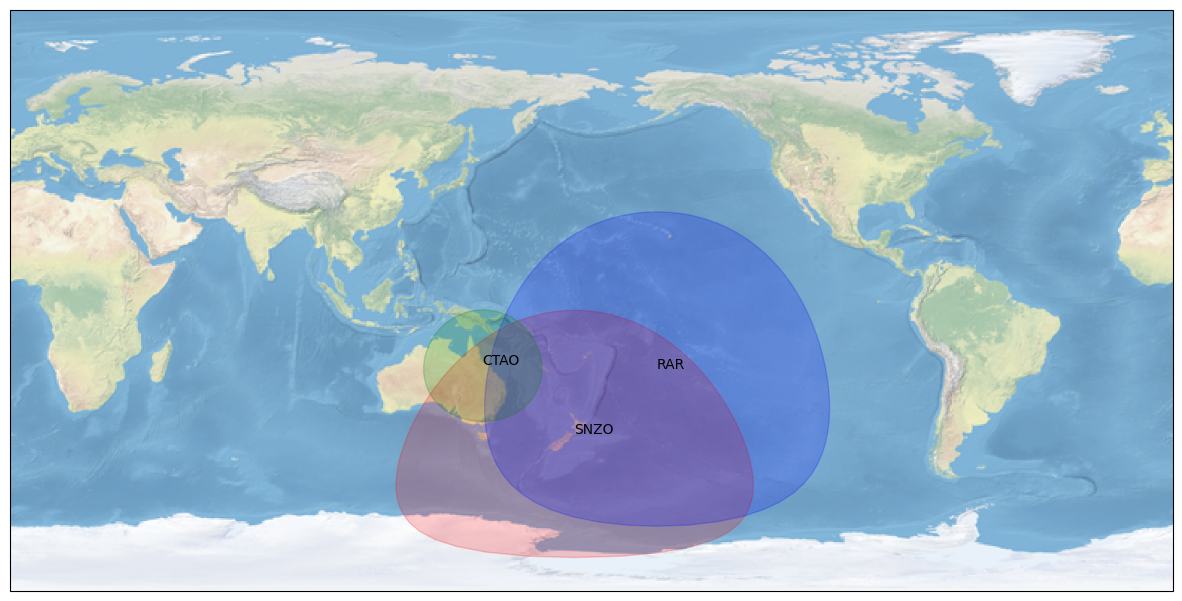

In [ ]:
#!pip install cartopy # install cartopy if you do not have it
#!pip uninstall -y shapely # this is a current issue with cartopy and shapely.
#!pip install shapely --no-binary shapely # hopefully, these two lines can go soon.

import cartopy.crs as ccrs

# define a map, and its projection:
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.stock_img()

# Plot a circle on the map, centered on "station" with a lat lon. The radius is "radius"
station='SNZO'
radius = epi_distance #km
lon= 174.704
lat=-41.309

# Plot a circle on the map, centered on "station" with a lat lon. The radius is "radius"
rstation='RAR'
rradius = repi_distance #km
rlon=-159.7733
rlat=-21.2125

# Plot a circle on the map, centered on "station" with a lat lon. The radius is "radius"
astation='CTAO'
aradius = pepi_distance #km
alon= 146.2545
alat=-20.0882

ax.tissot(rad_km=radius, lons=lon, lats=lat, alpha=0.2, color='r')
ax.text(lon,lat,station,transform=ccrs.Geodetic())

ax.tissot(rad_km=rradius, lons=rlon, lats=rlat, alpha=0.2, color='b')
ax.text(rlon,rlat,rstation,transform=ccrs.Geodetic())

ax.tissot(rad_km=aradius, lons=alon, lats=alat, alpha=0.2, color='g')
ax.text(alon,alat,astation,transform=ccrs.Geodetic())

plt.show()



#### Question 16
With the code used to download data for station SNZO, obtain seismograms from two other stations. Then repeat steps 12-15 two draw two more circles on your map. [This page](https://www.fdsn.org/networks/detail/IU/) contains a map with all the different stations you could use and their corresponding station codes.
#### Question 17
Estimate the origin time $T_0$ and epicentre to find the most likely candidate for this earthquake. in an earthquake catalogue. Add the epicentre of this earthquake to your map to see how close your estimate is to that of the professionals. You may have to make a new map that zooms in around the epicentre to judge and discuss your results.  

In [ ]:
t0nz = epi_distance / 8
t0rar = repi_distance / 8
t0oz = pepi_distance / 8
#assuming the wave travels at 8km/s

esti_nz_time = p - t0nz
esti_raro_time = rp - t0rar
esti_oz_time = a_p - t0oz
print(esti_nz_time)
print(esti_raro_time)
print(esti_oz_time)
#it appears that two got very siilar times.
#https://www.volcanodiscovery.com/earthquakes/2014/04/13/12/36/magnitude7-SolomonIslands-quake.html
# from that website, it appears the the time from OZ was very close
#this website said 12:36:19. off by 6 seconds.

2024-08-17T19:10:43.511902Z
2024-08-17T19:10:25.033984Z
2024-08-17T19:10:21.089313Z


Extension:
To get to 4 load factor, I overhead that I should redo questions 13 - 17 with a different earthquake.I'll be trying the recent Taiwan earthquake

Initallizing data


<Figure size 640x480 with 0 Axes>

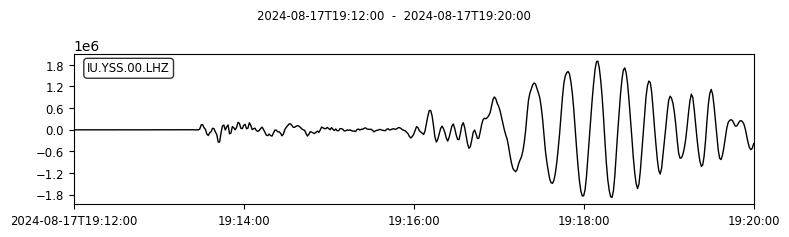

<Figure size 640x480 with 0 Axes>

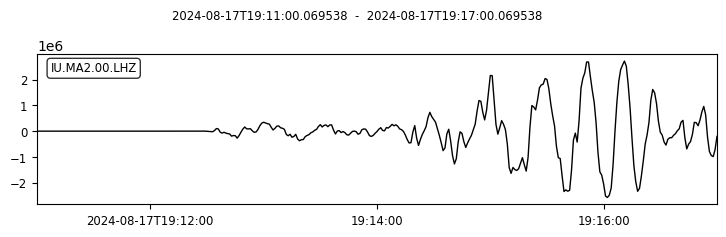

<Figure size 640x480 with 0 Axes>

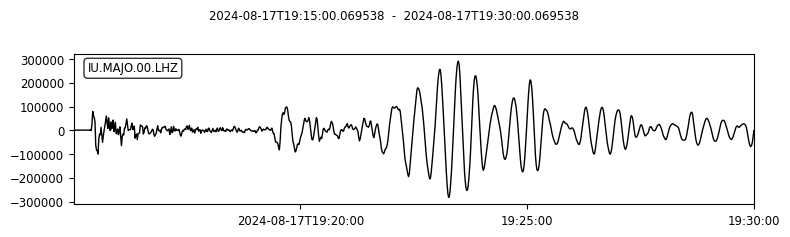

In [ ]:
client = Client("IRIS") # IRIS is the host of the data
t1 = UTCDateTime('2024-08-17T19:10:00 ') # start time
t2 = t1 + 3600 # end time
st = client.get_waveforms("IU", "YSS", "00", "LHZ", t1, t2)  # in later parts, you can ex-change SNZO for another stations.

st.trim(starttime = UTCDateTime('2024-08-17T19:12:00 '), endtime = UTCDateTime('2024-08-17T19:20:00'))

plt.figure()
st.plot()
plt.show()

#Rarotonga, Cook Island


st_r = client.get_waveforms("IU", "MA2", "00", "LHZ", t1, t2)  # in later parts, you can ex-change SNZO for another stations.

st_r.trim(starttime = UTCDateTime('2024-08-17T19:11:00 '), endtime = UTCDateTime('2024-08-17T19:17:00'))

plt.figure()
st_r.plot()
plt.show()

#OZ


st_a = client.get_waveforms("IU", "MAJO", "00", "LHZ", t1, t2)  # in later parts, you can ex-change SNZO for another stations.

st_a.trim(starttime = UTCDateTime('2024-08-17T19:15:00 '), endtime = UTCDateTime('2024-08-17T19:30:00'))

plt.figure()
st_a.plot()
plt.show()

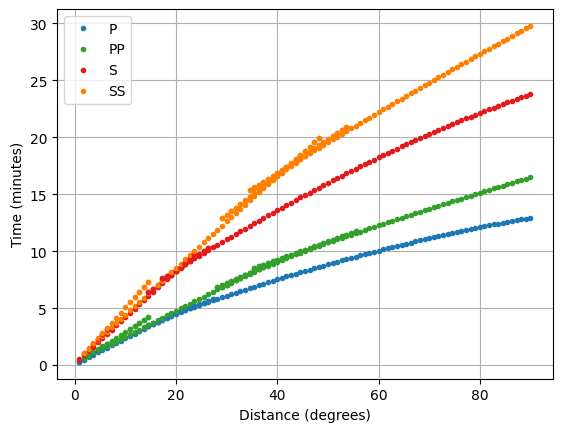

In [ ]:

ax = plot_travel_times(source_depth=30, max_degrees = 90, phase_list=["S","P","SS","PP"],npoints=100)


Next up is locating the p, pp, s and ss wave.

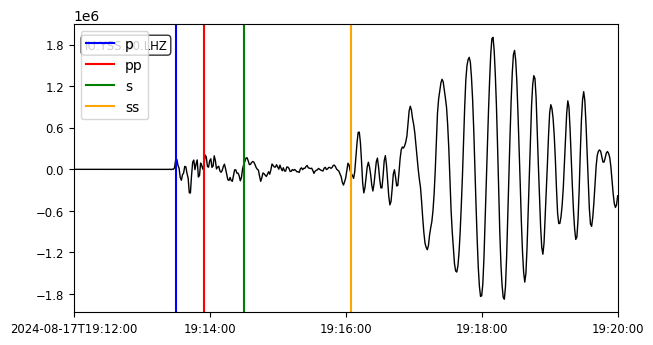

In [ ]:
p = t1 + 210
pp = t1 + 235
s = t1 + 270
ss = t1 + 365

fig = plt.figure()
st.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=p.datetime, label='p', color='blue')
ax.axvline(x=pp.datetime, label='pp', color='red')
ax.axvline(x=s.datetime, label='s', color='green')
ax.axvline(x=ss.datetime, label='ss', color='orange')
plt.legend()
plt.show()

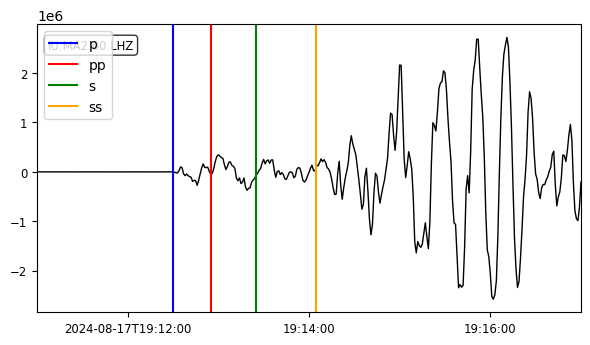

In [ ]:
#Raro
rp = t1 + 150
rpp = t1 + 175
rs = t1 + 205
rss = t1 + 245

fig = plt.figure()
st_r.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=rp.datetime, label='p', color='blue')
ax.axvline(x=rpp.datetime, label='pp', color='red')
ax.axvline(x=rs.datetime, label='s', color='green')
ax.axvline(x=rss.datetime, label='ss', color='orange')
plt.legend()
plt.show()

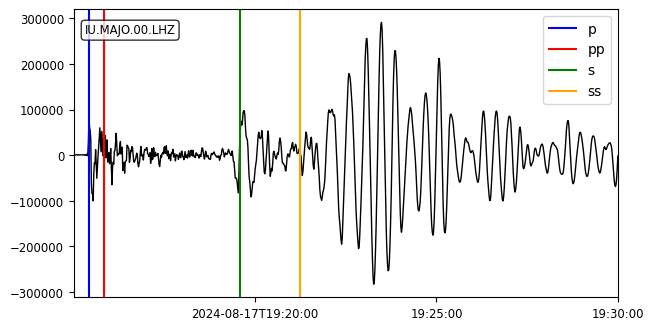

In [ ]:
#OZ
a_p = t1 + 325
a_pp = t1 + 350
a_s = t1 + 575
a_ss = t1 + 675

fig = plt.figure()
st_a.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=a_p.datetime, label='p', color='blue')
ax.axvline(x=a_pp.datetime, label='pp', color='red')
ax.axvline(x=a_s.datetime, label='s', color='green')
ax.axvline(x=a_ss.datetime, label='ss', color='orange')
plt.legend()
plt.show()

Onto analysis

In [ ]:

#Assume the speed is 8 Km/s
delay_ps = (s-p)/60
delay_ppp = (pp - p)/60
delay_pss = (ss - p)/60 # all in minutes
print("YSS")
print("delay_ppp",delay_ppp)
print("delay_ps",delay_ps)
print("delay_pss",delay_pss)

# From graph it looked lik 38 degrees from a depth of 100km
# 39 degrees to rads roughly 0.66
epi_distance = (R*np.sin(0.20944))/np.sin(np.pi/2 - 0.20944/2)
print(epi_distance)

# Rarotonga
delay_ps = (rs-rp)/60
delay_ppp = (rpp - rp)/60
delay_pss = (rss - rp)/60 # all in minutes
print('\n',"MA2")
print("delay_ppp",delay_ppp)
print("delay_ps",delay_ps)
print("delay_pss",delay_pss)
# about 53 degrees
repi_distance = (R*np.sin(0.15708))/np.sin(np.pi/2 - 0.15708/2)
print(repi_distance)

# Australia
print('\n',"MAJO")
delay_ppp = (a_pp - a_p)/60
delay_ps = (a_s-a_p)/60
delay_pss = (a_ss - a_p)/60 # all in minutes

print("delay_ppp",delay_ppp)
print("delay_ps",delay_ps)
print("delay_pss",delay_pss)
# about 25 degrees
pepi_distance = (R*np.sin(0.383972))/np.sin(np.pi/2 - 0.383972/2)
print(pepi_distance)



YSS
delay_ppp 0.4166666666666667
delay_ps 1.0
delay_pss 2.5833333333333335
1331.904782128556

 MA2
delay_ppp 0.4166666666666667
delay_ps 0.9166666666666666
delay_pss 1.5833333333333333
999.7281307491024

 MAJO
delay_ppp 0.4166666666666667
delay_ps 4.166666666666667
delay_pss 5.833333333333333
2431.2854958770895


/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:790: UserWarning: Approximating coordinate system <Geographic 2D CRS: +proj=lonlat +datum=WGS84 +ellps=WGS84 +no_defs +t ...>
Name: unknown
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
 with the PlateCarree projection.
  warnings.warn(f'Approximating coordinate system {crs!r} with '
/usr

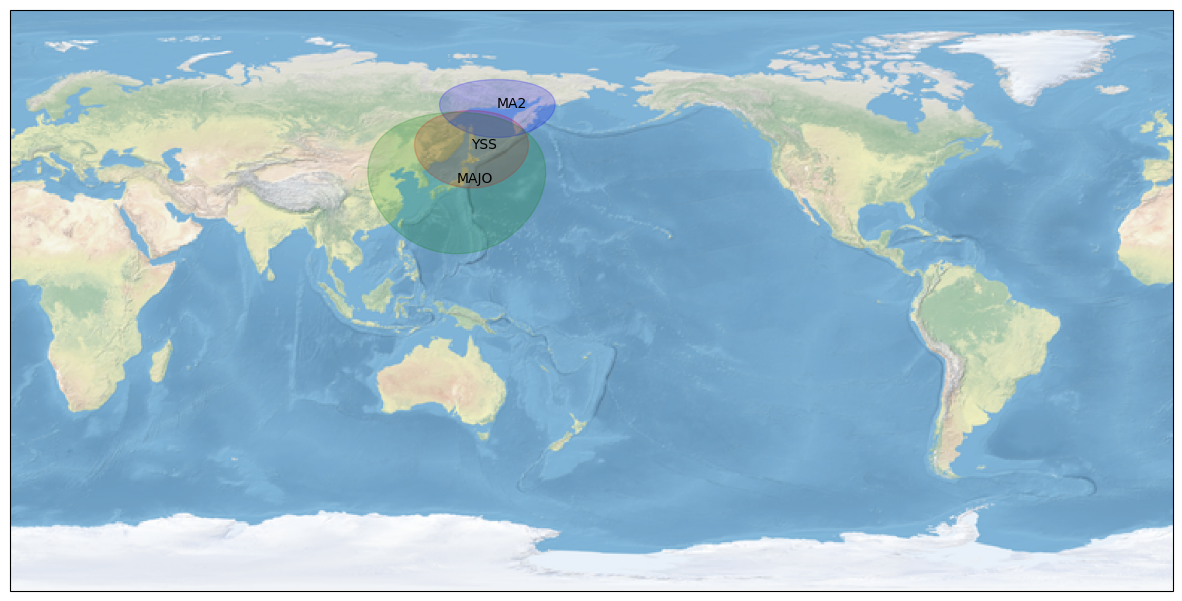

In [ ]:

# define a map, and its projection:
plt.figure(figsize=(15,15))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.stock_img()

# Plot a circle on the map, centered on "station" with a lat lon. The radius is "radius"
station='YSS'
radius = epi_distance #km
lon= 142.7604
lat=46.9587

# Plot a circle on the map, centered on "station" with a lat lon. The radius is "radius"
rstation='MA2'
rradius = repi_distance #km
rlon=150.77
rlat=	59.5756

# Plot a circle on the map, centered on "station" with a lat lon. The radius is "radius"
astation='MAJO'
aradius = pepi_distance #km
alon= 138.20406
alat=36.54567

ax.tissot(rad_km=radius, lons=lon, lats=lat, alpha=0.2, color='r')
ax.text(lon,lat,station,transform=ccrs.Geodetic())

ax.tissot(rad_km=rradius, lons=rlon, lats=rlat, alpha=0.2, color='b')
ax.text(rlon,rlat,rstation,transform=ccrs.Geodetic())

ax.tissot(rad_km=aradius, lons=alon, lats=alat, alpha=0.2, color='g')
ax.text(alon,alat,astation,transform=ccrs.Geodetic())

plt.show()

Estimating Arrival time


In [ ]:
t0nz = epi_distance / 8
t0rar = repi_distance / 8
t0oz = pepi_distance / 8
#assuming the wave travels at 8km/s

esti_nz_time = p - t0nz
esti_raro_time = rp - t0rar
esti_oz_time = a_p - t0oz
print(esti_nz_time)
print(esti_raro_time)
print(esti_oz_time)
#it appears that two got very siilar times.
#https://www.volcanodiscovery.com/earthquakes/9554970/2024-08-17/19h10/magnitude6-Off-East-Coast-of-Kamchatka.html
# from that website, it appears the the time from OZ was very close
#All were within the minute..

2024-08-17T19:10:43.511902Z
2024-08-17T19:10:25.033984Z
2024-08-17T19:10:21.089313Z


References:
https://earthquake.usgs.gov/earthquakes/events/1906calif/18april/earthwaves.php